In [1]:
import sys; sys.path.append('..')
import random
import pyzx as zx
%config InlineBackend.figure_format = 'svg'

In [2]:
g0 = zx.generate.cliffords(4,100)
zx.d3.draw(g0)

In [3]:
zx.simplify.clifford_simp(g0)

spider_simp: 35. 21. 10. 7. 3. 1.  6 iterations
id_simp: 16. 3.  2 iterations
spider_simp: 13. 5. 4. 1.  4 iterations
pivot_simp: 12. 4. 2. 2. 1.  5 iterations
lcomp_simp: 18. 8. 5. 4. 1. 1. 2. 2. 1. 1. 1. 1.  12 iterations
pivot_simp: 1. 1.  2 iterations


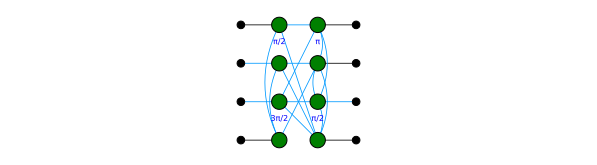

In [4]:
g0.normalise()
zx.draw(g0)

In [5]:
g1 = zx.generate.cliffords(8,100000)
zx.simplify.clifford_simp(g1)

spider_simp: 36629. 22507. 12247. 5824. 2120. 511. 102. 14.  8 iterations
id_simp: 12988. 1558. 11.  3 iterations
spider_simp: 13689. 6850. 2759. 817. 157. 22. 3.  7 iterations
pivot_simp: 9719. 3581. 1449. 549. 171. 32. 4.  7 iterations
lcomp_simp: 18453. 6918. 4407. 3074. 2342. 1863. 1507. 1251. 1054. 910. 779. 690. 595. 526. 473. 425. 372. 344. 291. 251. 245. 221. 205. 193. 196. 190. 164. 160. 154. 142. 124. 121. 112. 110. 99. 96. 92. 74. 66. 66. 55. 52. 58. 46. 44. 42. 41. 35. 31. 33. 23. 25. 22. 22. 21. 24. 22. 19. 18. 15. 14. 15. 9. 9. 10. 7. 5. 4. 7. 4. 6. 6. 7. 7. 7. 5. 5. 5. 5. 5. 4. 5. 4. 4. 3. 3. 3. 4. 3. 2. 1. 1. 2. 1. 1.  95 iterations


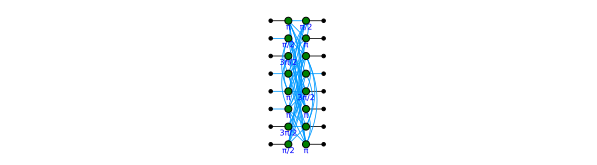

In [6]:
g1.normalise()
zx.draw(g1)

In [ ]:
random.seed(1344) # Make sure the same circuit is generated
g = zx.generate.cliffordT(4,350,p_t=0.01) # Generate the circuit as a ZX-diagram
c = zx.Circuit.from_graph(g) # Convert it to a sequence-of-gates representation
print(c.stats())

In [ ]:
c2 = zx.optimize.basic_optimization(c.split_phase_gates())
print(c2.stats())

In [ ]:
g = c2.to_graph()
zx.d3.draw(g)

Now we simplify our circuit

In [ ]:
zx.simplify.clifford_simp(g) # This does the simplification routine from the paper
g.normalise() # This simply puts the circuit in a more compact format, that allows easy visualisation
zx.d3.draw(g)

Finally we extract a circuit from this diagram.

In [ ]:
c = zx.extract.streaming_extract(g.copy())
print(c.to_basic_gates().stats())
zx.d3.draw(c.to_graph())